## Memo
* Install kaggle-cli and download dataset
* move all `cat*` to `cats/`, same for dogs
* take 1000 random pictures and move them to valid/cats/ with `shuf -n 1000 -e train/cat* | xargs -i mv {} valid/cats/`, same for dogs
Furthermore use
* `ls /train/cats/ | wc -l` to count files in `/train/cats/`
* `ls /train/cats/ | grep -v 'cat'` to find all files that DON'T have cat in it. `-v`-flag inverts search.
* use: `mv /train/cat* /valid/cats` and `cp` to do the rest
* copy utils etc: `cp -t ~/fastai/ vgg16.py vgg16bn.py utils.py resnet50.py`

In [30]:
%matplotlib inline
# path = "data/dogscats/"
path = "data/dogscats/sample/"

In [31]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import csv
import math

import utils; reload(utils)
from utils import plots
import vgg16; reload(vgg16)
from vgg16 import Vgg16

batch_size = 8

vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
test_batches = vgg.get_batches(path+'temptest', batch_size=batch_size, shuffle=False)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 12 images belonging to 1 classes.
Epoch 1/1
16/16 [==============================] - 9s - loss: 0.4817 - acc: 0.8125 - val_loss: 1.0845 - val_acc: 0.7500


In [32]:
def pred_batch(imgs):
    (preds, idxs, labels) = vgg.predict(imgs)
    return preds,idxs, labels

In [33]:
def dogness(test_batches):
    imgs,nothing = next(test_batches)
    plots(imgs)
    preds, idxs, labels = pred_batch(imgs)
    output = np.multiply(preds, idxs) + np.multiply(1.-preds, 1-idxs)
    return output, labels

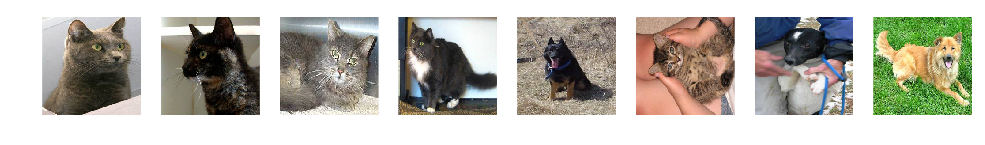

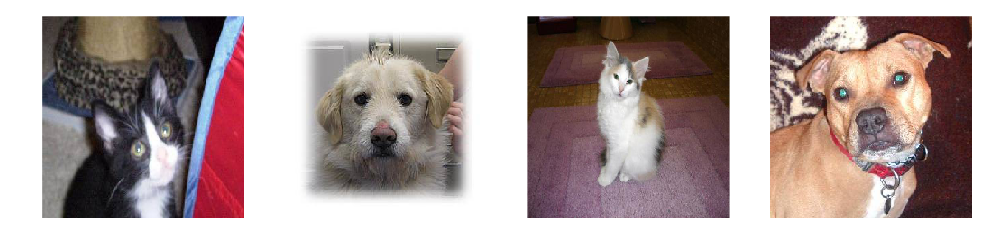

In [36]:
# testfolder_size = 12500
testfolder_size = 12
N = int(math.ceil(testfolder_size/batch_size))
with open('test.csv', 'wb') as f:
    fieldnames = ['id', 'label']
    wr = csv.writer(f, delimiter=',')
    wr.writerow(fieldnames)
    for i in range(N):
        temp = enumerate(dogness(test_batches)[0], 1+i*batch_size)
        for j in temp:
            wr.writerow(j)

[  2.4071e-03   4.6962e-04   1.1281e-03   2.0470e-03   1.1777e-01   1.2684e-02   2.3919e-01
   6.1708e-01]
['cats', 'cats', 'cats', 'dogs']


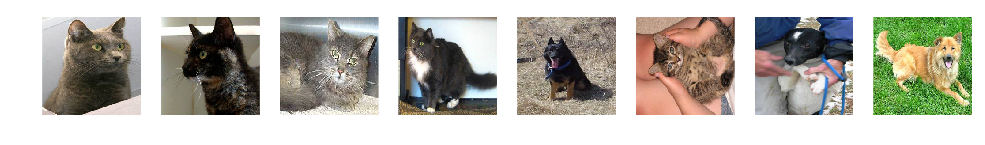

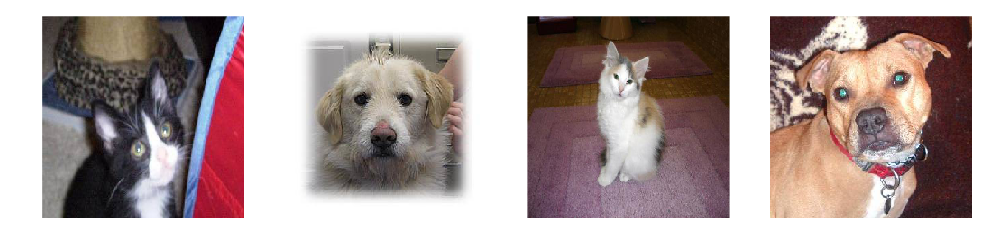

In [35]:
print(dogness(test_batches)[0])
print(dogness(test_batches)[1])